In [1]:
import MalekFinance as mf
import pandas as pd
import numpy as np
import datetime as dt
from pandas.tseries.offsets import MonthEnd
from itertools import chain
pd.set_option('display.float_format', '{:.4f}'.format)

# Nearest To Expiry

In [2]:
prices_t_plus_1 = mf.read('LSEG Data','LSEG Futures Data Named Title',index_col=0,header=0,parse_dates=True)
returns = prices_t_plus_1.pct_change()
returns = returns.replace({0:np.nan})
returns.loc['2009-10-6','Heating Oil Futures'] = 0
returns.loc['2017-11-6','Japanese Yen'] = 0
returns.loc['2017-10-16','Japanese Yen'] = 0
prices_t_plus_1 = prices_t_plus_1.resample('M').last()
prices_t_plus_1

,CAC 40 Future,DAX Future,DJ EURO STOXX 50,Dow Jones,FTSE 100 Future,Hang Seng Future,NASDAQ 100 E-mini,Nikkei 225 Future,Russell 2000 Mini,S&P 500,...,Euro-Schatz Future,Eurodollar,Euroswiss Future,Interest Rate 30-Day,Long Gilt Future,Short Sterling Future,U.S. Treasury 2-Year,U.S. Treasury 5-Year,U.S. Treasury 10-Year,U.S. Treasury 30-Year
RIC,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,7513.5000,16549.0000,4496.0000,35695.0000,7689.0000,20203.0000,15857.5000,33260.0000,2013.6000,NaN,...,105.0500,NaN,NaN,94.8800,96.1300,NaN,101.5156,106.8203,111.4062,124.4375
2023-08-31,7328.5000,15999.0000,4313.0000,34791.0000,7462.5000,18304.0000,15538.5000,32610.0000,1901.6000,NaN,...,105.1200,NaN,NaN,94.6700,95.4100,NaN,101.5117,106.4062,110.5625,121.5625
2023-09-30,7151.5000,15526.0000,4204.0000,33725.0000,7671.0000,17889.0000,14866.5000,31860.0000,1798.6000,NaN,...,104.9900,NaN,NaN,94.6700,94.1600,NaN,101.4844,105.1562,108.0625,113.7812


# 2nd Nearest To Expirey

In [3]:
prices_t_plus_2 = mf.read('LSEG Data','LSEG Futures Data c2',index_col=0,header=1,parse_dates=True)
prices_t_plus_2.columns = prices_t_plus_2.columns.str.replace('c2', 'c1')
prices_t_plus_2.columns = prices_t_plus_2.columns.str.replace('^2', '')
prices_t_plus_2.columns = prices_t_plus_2.columns.str.replace('0', '')
prices_t_plus_2 = prices_t_plus_2.resample('M').last()
conversion = pd.read_excel('/Users/malek/Documents/LSEG Data/LSEG Futures RIC Codes.xlsx')
conversion.columns = ['1','2']
mydict = dict(zip(conversion['1'],conversion['2']))
prices_t_plus_2.rename(columns=mydict,inplace=True)
prices_t_plus_2

,CAC 40 Future,DAX Future,DJ EURO STOXX 50,Dow Jones,FTSE 100 Future,Hang Seng Future,NASDAQ 100 E-mini,Nikkei 225 Future,Russell 2000 Mini,S&P 500,...,Euro-Schatz Future,Eurodollar,Euroswiss Future,Interest Rate 30-Day,Long Gilt Future,Short Sterling Future,U.S. Treasury 2-Year,U.S. Treasury 5-Year,U.S. Treasury 10-Year,U.S. Treasury 30-Year
RIC,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,7536.5000,16705.0000,4526.0000,36029.0000,7749.5000,20198.0000,16058.0000,33010.0000,2033.8000,NaN,...,105.4000,NaN,NaN,94.6725,96.3600,NaN,102.0117,107.4141,111.9688,124.6875
2023-08-31,7348.5000,16152.0000,4341.0000,35121.0000,7522.0000,18354.0000,15733.0000,32380.0000,1921.2000,NaN,...,105.4800,NaN,NaN,94.6600,95.5700,NaN,101.9023,106.9219,111.0312,121.6875
2023-09-30,7170.5000,15693.0000,4236.0000,34061.0000,7703.0000,17913.0000,15057.0000,31800.0000,1818.6000,NaN,...,105.2600,NaN,NaN,94.6725,94.2400,NaN,101.3555,105.3594,108.4688,113.8438


In [4]:
monthly_returns = returns.resample('M').agg(lambda x: (x+1).prod()-1)
monthly_returns.replace({0:np.nan},inplace=True)
formation_dates = pd.date_range('1981-12','2023-10-31',freq='M')
returns_dates = pd.date_range('1982-1','2023-11-30',freq='M')
formation_datesD = pd.date_range('1980-12','2023-10-31',freq='M')
filler = pd.DataFrame(index=formation_datesD)
returns = returns.combine_first(filler)
past_std = returns.ewm(span=252,min_periods=80).std()*(252**0.5) 
returns_datesD = returns['1981-01':].index

# Carry Daily

In [5]:
def Carry_Daily(formation):
    Vol = pd.DataFrame(past_std.loc[formation])
    Vol.replace({0:np.nan},inplace=True)
    Vol.dropna(inplace=True)
    Vol[Vol.iloc[:,0] < 0.01] = 0.01
    t_plus_1 = pd.DataFrame(prices_t_plus_1.loc[formation])
    t_plus_2 = pd.DataFrame(prices_t_plus_2.loc[formation])
    Carry = (t_plus_2 - t_plus_1)/t_plus_1
    Carry.columns = ['Roll Yield']
    Carry.dropna(inplace=True)
    Long = pd.DataFrame(Carry['Roll Yield'][Carry['Roll Yield'] > 0])
    Short = pd.DataFrame(Carry['Roll Yield'][Carry['Roll Yield'] < 0])
    Long['Ranking'] = 1
    Short['Ranking'] = -1
    Signal = pd.concat([Long,Short],axis=0).sort_values(by='Ranking',ascending=False)
    RET = monthly_returns.loc[formation + MonthEnd(1),monthly_returns.columns.isin(Carry.index)]
    wppp = pd.concat([RET,Signal['Ranking'],Vol],axis=1)
    wppp.dropna(inplace=True)
    wppp.columns = ['RET','Signal','Vol']
    wppp['Natural Weighting'] = (1/wppp['Vol'])/sum(1/wppp['Vol']) *wppp['Signal']
    wppp.dropna(inplace=True)
    p = formation + MonthEnd(1)
    l = f'{p.year}-{p.month}'
    lenl = len(returns.loc[l].index)
    s = [[returns.loc[l].iloc[i]] for i in range(0,lenl)]
    wppp.drop([wppp.columns[0]],axis=1,inplace=True)
    def daily(i,wppp):
        wppp = wppp[wppp.index.isin(s[i][0].index)]
        s[i][0][s[i][0].index.isin(wppp.index)]
        wppp['1-Day Ret'] = s[i][0]
        wppp.dropna(inplace=True)
        momentum_profit = sum(wppp['Natural Weighting'] * wppp.iloc[:,3])
        return momentum_profit
    prof = [daily(i,wppp) for i in range(0,lenl)]
    return prof

collect = [Carry_Daily(i) for i in formation_datesD]
Daily_RET = list(chain(*collect))
Carry_ReturnsD = pd.DataFrame(Daily_RET,index=returns_datesD)

In [6]:
mf.summary_daily(Carry_ReturnsD)

Annual Return: 1.78%
Annual Volity: 2.60%
Sharpe Ratio: 0.68
Max Drawdown: -12.3%


# Vol Targetted Carry

Sharpe Ratio: 0.88


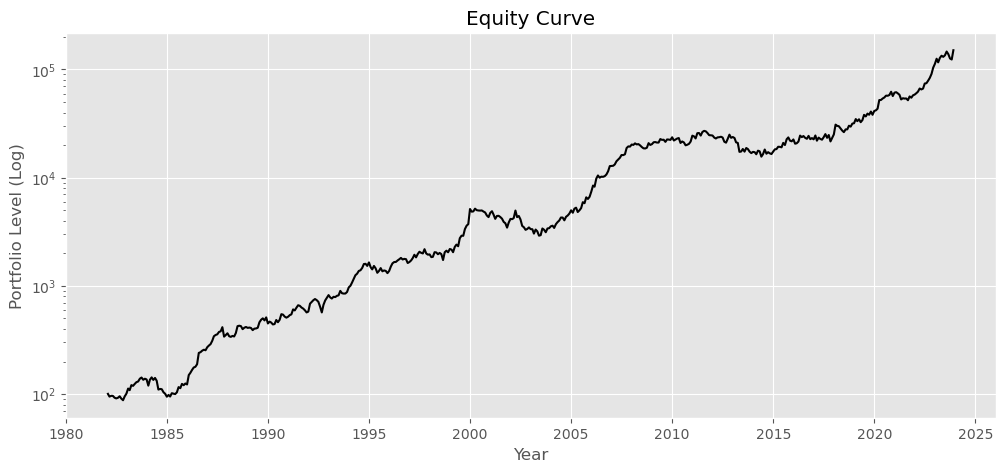

In [12]:
def Carry(formation):
    Vol = pd.DataFrame(past_std.loc[formation])
    Vol.replace({0:np.nan},inplace=True)
    Vol.dropna(inplace=True)
    Vol[Vol.iloc[:,0] < 0.01] = 0.01
    t_plus_1 = pd.DataFrame(prices_t_plus_1.loc[formation])
    t_plus_2 = pd.DataFrame(prices_t_plus_2.loc[formation])
    Carry = (t_plus_2 - t_plus_1)/t_plus_1
    Carry.columns = ['Roll Yield']
    Carry.dropna(inplace=True)
    Long = pd.DataFrame(Carry['Roll Yield'][Carry['Roll Yield'] > 0])
    Short = pd.DataFrame(Carry['Roll Yield'][Carry['Roll Yield'] < 0])
    Long['Ranking'] = 1
    Short['Ranking'] = -1
    Signal = pd.concat([Long,Short],axis=0).sort_values(by='Ranking',ascending=False)
    RET = monthly_returns.loc[formation + MonthEnd(1),monthly_returns.columns.isin(Carry.index)]
    wppp = pd.concat([RET,Signal['Ranking'],Vol],axis=1)
    wppp.dropna(inplace=True)
    wppp.columns = ['RET','Signal','Vol']
    wppp['Natural Weighting'] = (1/wppp['Vol'])/sum(1/wppp['Vol']) *wppp['Signal']
    TT = len(Carry_ReturnsD[:formation])
    wppp['Vol Targetted Weight'] = wppp['Natural Weighting'] * (0.10/((Carry_ReturnsD[TT-252:TT].ewm(span=252).std()*(252**0.5)).iloc[-1,0]))
    Carry_Profit = sum(wppp.iloc[:,0] * wppp['Vol Targetted Weight'])
    return Carry_Profit

Carry_Returns = pd.DataFrame(data={'Carry':[Carry(i) for i in formation_dates]},index=returns_dates)
mf.plotequitycurve(Carry_Returns*2)

In [8]:
mf.summary(Carry_Returns)

Annual Return: 10.05%
Annual Volity: 11.42%
Sharpe Ratio: 0.88
Max Drawdown: -23.4%


In [9]:
mf.skw(Carry_Returns)

Skewness: 0.62


Annual Return: 10.05%


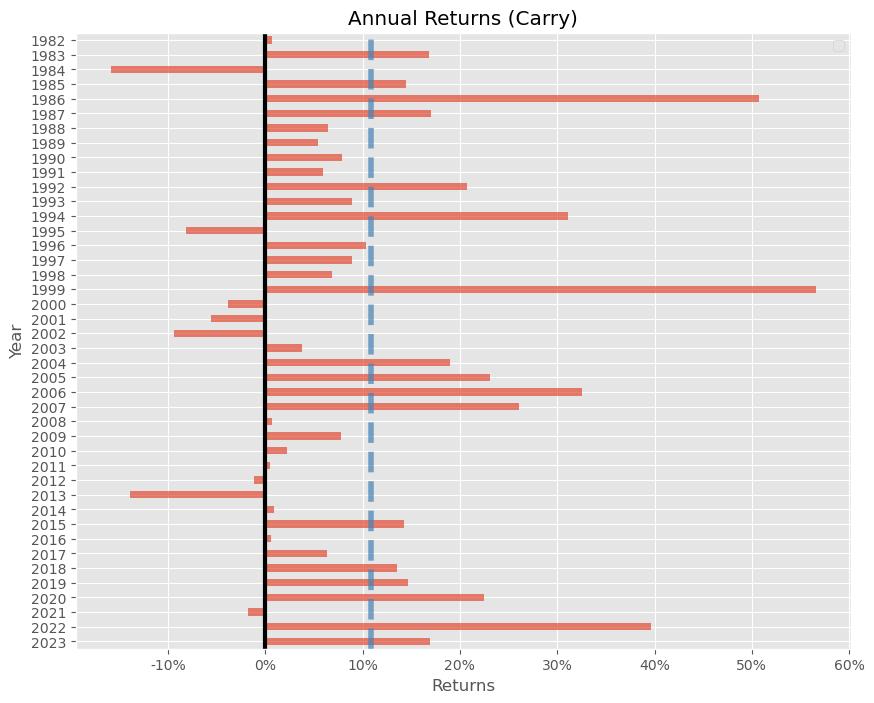

In [10]:
mf.plotyearly(Carry_Returns)

Max Drawdown: -23.4%


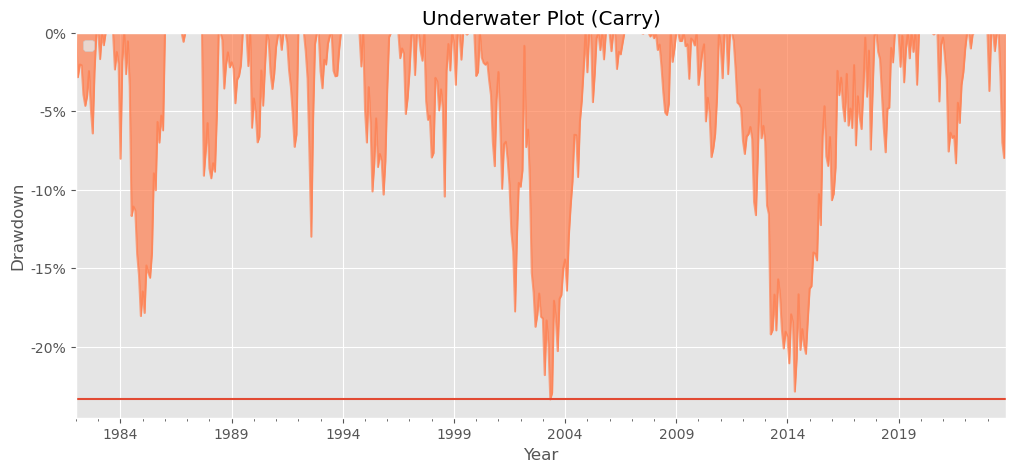

In [11]:
mf.plotdrawdown(Carry_Returns)